<a href="https://colab.research.google.com/github/southeastwind13/deep_learning/blob/main/3_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load data
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [3]:
# Check data type
type(data)

sklearn.utils._bunch.Bunch

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
data.data.shape

(569, 30)

In [6]:
# Target is category
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
# Target meaning
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
# Check number of targte = number of data
data.target.shape

(569,)

In [9]:
# Data meaning
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
# Split train-test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=0)
N, D = X_train.shape

In [11]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
def convert_numpy_to_tensor(data:np.ndarray, number_of_samples:int, number_of_features:int):
    return torch.from_numpy(data.reshape(number_of_samples, number_of_features)).astype(np.float32)

In [13]:
# Data convertion
X_train = torch.from_numpy(X_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [14]:
y_train.shape

torch.Size([455, 1])

In [15]:
# Create model
model = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)

In [16]:
# Loss and Optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [17]:
# Training

n_epochs = 1000

train_losses = []
test_losses = []

for epoch in range(n_epochs):

    optimizer.zero_grad()

    # Forward pass
    y_pred = model(X_train)
    train_loss = criterion(y_pred, y_train)

    train_losses.append(train_loss.item())

    # Backward pass
    train_loss.backward()
    optimizer.step()

    # Test model
    y_pred_test = model(X_test)
    test_loss = criterion(y_pred_test, y_test)

    test_losses.append(test_loss.item())

    if (epoch+1) % 50 == 0:
        print(f'Epoch: {epoch+1}/{n_epochs}, Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

Epoch: 50/1000, Train Loss: 0.5130, Test Loss: 0.4990
Epoch: 100/1000, Train Loss: 0.3790, Test Loss: 0.3681
Epoch: 150/1000, Train Loss: 0.3056, Test Loss: 0.2995
Epoch: 200/1000, Train Loss: 0.2587, Test Loss: 0.2568
Epoch: 250/1000, Train Loss: 0.2259, Test Loss: 0.2273
Epoch: 300/1000, Train Loss: 0.2019, Test Loss: 0.2056
Epoch: 350/1000, Train Loss: 0.1835, Test Loss: 0.1889
Epoch: 400/1000, Train Loss: 0.1690, Test Loss: 0.1757
Epoch: 450/1000, Train Loss: 0.1573, Test Loss: 0.1650
Epoch: 500/1000, Train Loss: 0.1477, Test Loss: 0.1561
Epoch: 550/1000, Train Loss: 0.1397, Test Loss: 0.1487
Epoch: 600/1000, Train Loss: 0.1329, Test Loss: 0.1423
Epoch: 650/1000, Train Loss: 0.1270, Test Loss: 0.1368
Epoch: 700/1000, Train Loss: 0.1219, Test Loss: 0.1320
Epoch: 750/1000, Train Loss: 0.1174, Test Loss: 0.1278
Epoch: 800/1000, Train Loss: 0.1134, Test Loss: 0.1241
Epoch: 850/1000, Train Loss: 0.1098, Test Loss: 0.1208
Epoch: 900/1000, Train Loss: 0.1066, Test Loss: 0.1178
Epoch: 950/

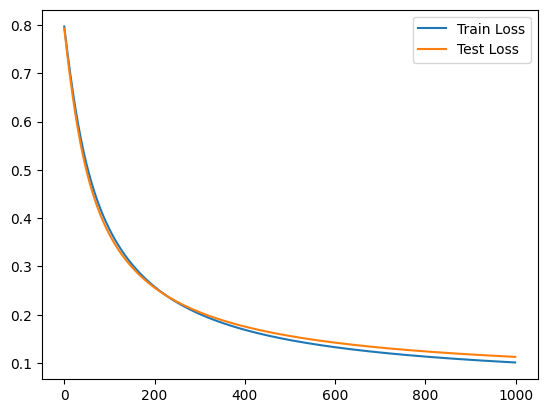

In [18]:
# Plot the train and test loss per iteration
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.show()

In [20]:
# Evaluate model by accuracy
with torch.no_grad():
  p_train = model(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(p_train == y_train.numpy())

  p_test = model(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(p_test == y_test.numpy())

print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

Train Accuracy: 0.9758, Test Accuracy: 0.9561


In [21]:
# Check the model parameters
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3771, -0.4716, -0.4874, -0.2906, -0.2778, -0.2895, -0.1601, -0.2171,
                       -0.2592,  0.4824, -0.4555, -0.1646, -0.2477, -0.2417,  0.1036,  0.1784,
                        0.0444, -0.3054,  0.2310,  0.3444, -0.5417, -0.3045, -0.2972, -0.4674,
                       -0.2525, -0.3556, -0.2110, -0.2352, -0.4658, -0.2907]])),
             ('0.bias', tensor([0.3925]))])

In [22]:
# Save model
torch.save(model.state_dict(), 'model.pt')

In [23]:
# Load model
# 1. We need to create a model with the same structure
model2 = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)
# 2. We need to load the parameters
model2.load_state_dict(torch.load('model.pt'))

<ipython-input-23-6f1b6883f2d8>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model2.load_state_dict(torch.load('model.pt'))


<All keys matched successfully>

In [24]:
# Evaluate the loaded model
with torch.no_grad():
  p_train = model2(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(p_train == y_train.numpy())

  p_test = model2(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(p_test == y_test.numpy())

print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

Train Accuracy: 0.9758, Test Accuracy: 0.9561


In [25]:
# Download file from colab to pc
from google.colab import files
files.download('model.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>